Conda installation

In [ ]:
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2020-12-07 02:33:21--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   194MB/s    in 0.4s    

2020-12-07 02:33:21 (194 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
!mkdir -p /root/.torch/models
!mkdir -p /root/.fastai/data
!ln -s /root/.torch/models /content
!ln -s /root/.fastai/data /content
!rm -rf /content/sample_data/
! conda install -c fastai fastai==1.0.61 --force -y
! conda install -c pandas pandas==1.0.0 --force -y


In [ ]:
#!kill -9 -1

sets up gdrive within fastai

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


the following three lines ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the fastai V1 library which sits on top of Pytorch 1.0. The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [ ]:
import fastai
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import *

In [ ]:
import fastai; fastai.__version__

'1.0.61'

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller batch size (you'll learn all about what this means during the course), and try again.

In [ ]:
bs = 64 
#bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

 install secure connection library

In [ ]:
!pip install 'pyOpenSSL>=0.11'

In [ ]:
!pip install -U -q PyDrive

     |████████████████████████████████| 987 kB 14.0 MB/s 
     |████████████████████████████████| 61 kB 31 kB/s 
     |████████████████████████████████| 98 kB 9.0 MB/s 
     |████████████████████████████████| 95 kB 5.1 MB/s 
     |████████████████████████████████| 91 kB 12.5 MB/s 
     |████████████████████████████████| 114 kB 61.8 MB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 155 kB 61.9 MB/s 
     |████████████████████████████████| 47 kB 5.5 MB/s 
     |████████████████████████████████| 100 kB 12.0 MB/s 
     |████████████████████████████████| 1.0 MB 58.7 MB/s 


sets up Google authentication for GDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

when using shell commands, use ! in the begining of line

In [ ]:
!ls '/content/gdrive/My Drive' 


find out pillow version - 4.3.0 and above support tif r/w

In [ ]:
from PIL import Image, ImageFile; 
ImageFile.LOAD_TRUNCATED_IMAGES = True;

prepare dataset csv with columns: 1.image filenames 2.classes(labels)


In [ ]:
#!mkdir /root/.fastai/data/#

!cp /content/gdrive/"My Drive"/POBREZA/cnn_ceni_col_2018_trn90_dane350.csv /root/.fastai/data
!cp /content/gdrive/"My Drive"/POBREZA/cnn_ceni_col_2018_test10_dane350.csv /root/.fastai/data

In [ ]:
df1 = pd.read_csv('/root/.fastai/data/cnn_ceni_col_2018_test10_dane350.csv')
df1.head()

name  bin_GMM
0  CNN_DIMG_COL_2018_ST_384_3840_13_000001.tif        1
1  CNN_DIMG_COL_2018_ST_384_3840_13_000003.tif        1
2  CNN_DIMG_COL_2018_ST_384_3840_13_000004.tif        3
3  CNN_DIMG_COL_2018_ST_384_3840_13_000005.tif        1
4  CNN_DIMG_COL_2018_ST_384_3840_13_000006.tif        1

In [ ]:
!ls /root/.fastai/data

cnn_ceni_col_2018_test10_dane350.csv  Imagery_06_12_2020      __MACOSX
cnn_ceni_col_2018_trn90_dane350.csv   Imagery_06_12_2020.zip


prepare tgz zipped file of all input images and then use shell script to convert tif format to jpg (32bit to 8bit) and to crop images exactly to desired size(384x384px)

In [ ]:
!cp /content/gdrive/"My Drive"/POBREZA/Imagery_06_12_2020.zip /root/.fastai/data/


In [ ]:
!ls /root/.fastai/data/

cnn_ceni_col_2018_test10_dane350.csv  Imagery_06_12_2020.zip
cnn_ceni_col_2018_trn90_dane350.csv


unpack the dataset

In [ ]:
#import zipfile
#with zipfile.ZipFile("/root/.fastai/data/CNN_IMGB_COL_2018_ST_384_TIF_3840_13_ALL_SEBAS.zip") as zip_ref:
#    zip_ref.extractall("/root/.fastai/data")

#zip = ZipFile('/root/.fastai/data/CNN_IMGB_COL_2018_ST_384_TIF_3840_13_ALL_SEBAS.zip')
#zip.extractall()  

import shutil
shutil.unpack_archive("/root/.fastai/data/Imagery_06_12_2020.zip", "/root/.fastai/data", "zip")

In [ ]:
#!tar -C /root/.fastai/data -zxvf /root/.fastai/data/CNN_IMGB_COL_2018_ST_384_TIF_3840_13_ALL_SEBAS.tar.gz


In [ ]:
!ls /root/.fastai/data/

cnn_ceni_col_2018_test10_dane350.csv  Imagery_06_12_2020      __MACOSX
cnn_ceni_col_2018_trn90_dane350.csv   Imagery_06_12_2020.zip


In [ ]:
!ls /root/.fastai/data/Imagery_06_12_2020/ | wc -l


3840


check dataset csv

load dataset into  ImageDataBunch

In [ ]:
import cv2
from fastai.imports import *

In [ ]:
from fastai import *
from pathlib import Path
from fastai.vision import *
import os
root_col='/root/.fastai/'
aug_tfms=[contrast(scale=(0.9, 1.11),p=0.9)
          , dihedral()
          , symmetric_warp(magnitude=(-0.2,0.2))
]
tfms = get_transforms(flip_vert=True, max_lighting=0.1
                    ,xtra_tfms=aug_tfms
                    )
data = ImageDataBunch.from_csv( 
path=root_col,
folder='data/Imagery_06_12_2020',
csv_labels='data/cnn_ceni_col_2018_trn90_dane350.csv',
valid_pct=0.2,
fn_col=0,
label_col=1,
ds_tfms=tfms,
size=384 
).normalize(imagenet_stats)


The first thing we do when we approach a problem is to take a look at the data. We always need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.


In [ ]:
path_img = '/root/.fastai/data/Imagery_06_12_2020/'
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_001013.tif'),
 PosixPath('/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_028498.tif'),
 PosixPath('/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_011381.tif'),
 PosixPath('/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_049501.tif'),
 PosixPath('/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_031949.tif')]

# Training

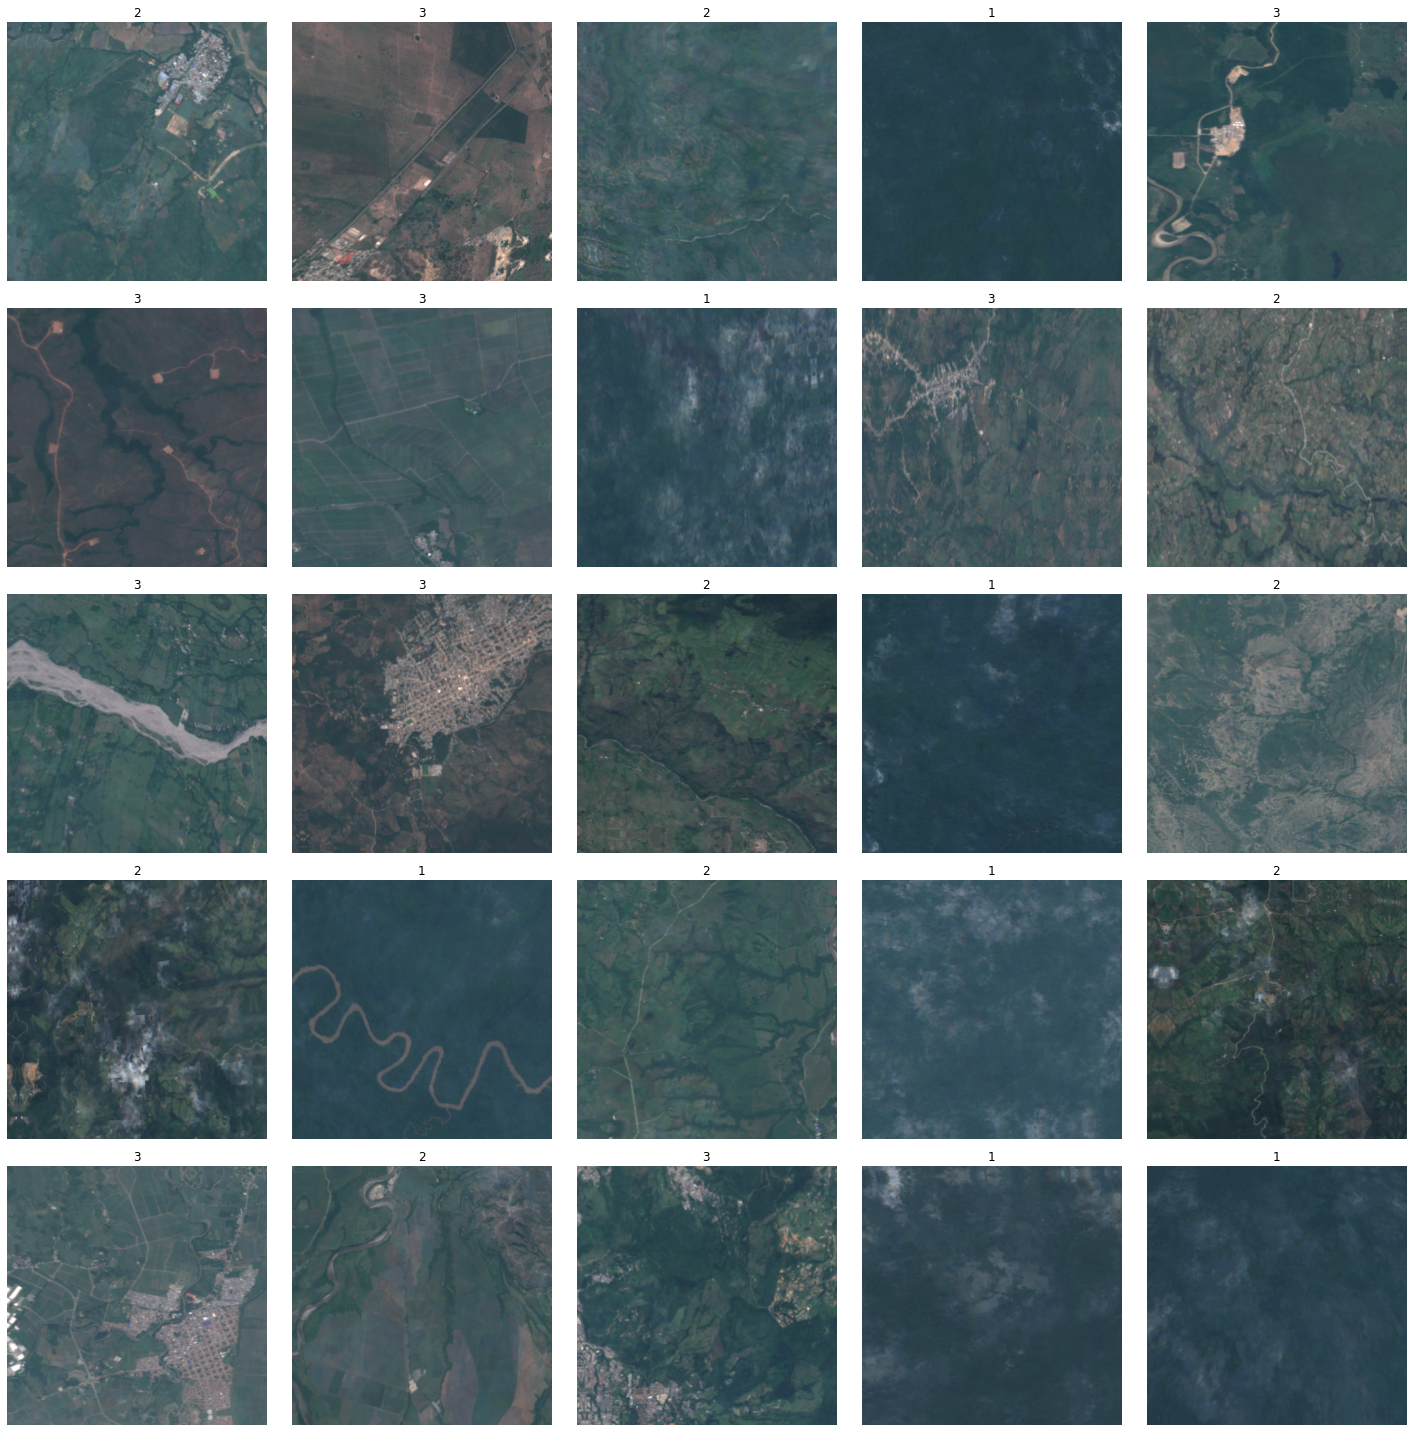

In [ ]:
data.show_batch(rows=5, figsize=(20,20))

In [ ]:
print(data.classes)
len(data.classes),data.c
len(data.train_ds), len(data.valid_ds) 

[1, 2, 3]


(2758, 689)

Training: resnet34

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = [error_rate], loss_func=torch.nn.CrossEntropyLoss())


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
callbacks = [
SaveModelCallback(learn, monitor='error_rate', mode='min', name='COL_2018_ST_VI_384_3840_13_ALL_trn90'),
ShowGraph(learn),
EarlyStoppingCallback(learn, min_delta=0.0001, patience=3)
]

learn.callbacks = callbacks

In [ ]:
learn.model

In [ ]:
!mkdir /root/.fastai/models/

mkdir: cannot create directory ‘/root/.fastai/models/’: File exists


In [ ]:
!ls /root/.fastai/models

COL_2018_ST_VI_384_3840_13_ALL_trn90.pth	    tmp.pth
Ex1_COL_2018_ST_VI_384_3840_13_ALL_trn90_final.pth


Better model found at epoch 0 with error_rate value: 0.14804063737392426.


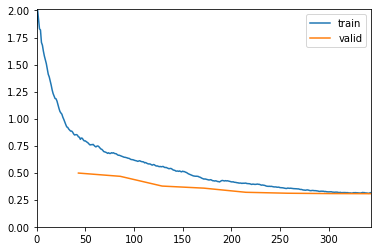

Better model found at epoch 2 with error_rate value: 0.13352684676647186.
Better model found at epoch 3 with error_rate value: 0.12917271256446838.
Better model found at epoch 4 with error_rate value: 0.11756168305873871.


In [ ]:
learn.fit_one_cycle(8,wd=0.1) 

unfreeze only last 2 layers, check optimal learning rate and continue with training of CNN

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 4.79E-07


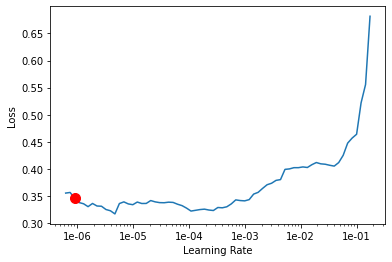

In [ ]:
learn.freeze_to(-2)
learn.lr_find()
learn.recorder.plot(suggestion=True)

Better model found at epoch 0 with error_rate value: 0.11756168305873871.


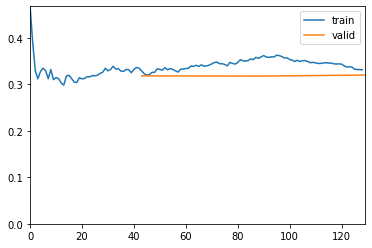

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(3,max_lr=slice(9.12E-07, 4.79E-07),wd=0.1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 2.75E-05


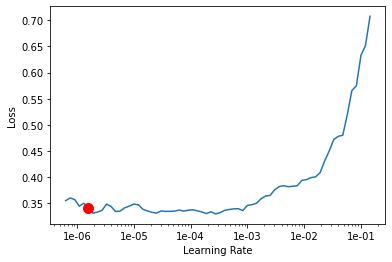

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

Better model found at epoch 0 with error_rate value: 0.11465892940759659.


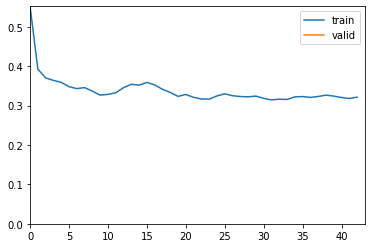

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1,max_lr=slice(1.58E-06, 1.58E-06 + 1.58E-06),wd=0.1)

Results

Let's see what results we have got.

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. 

Furthermore, we plot the confusion matrix. Model finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

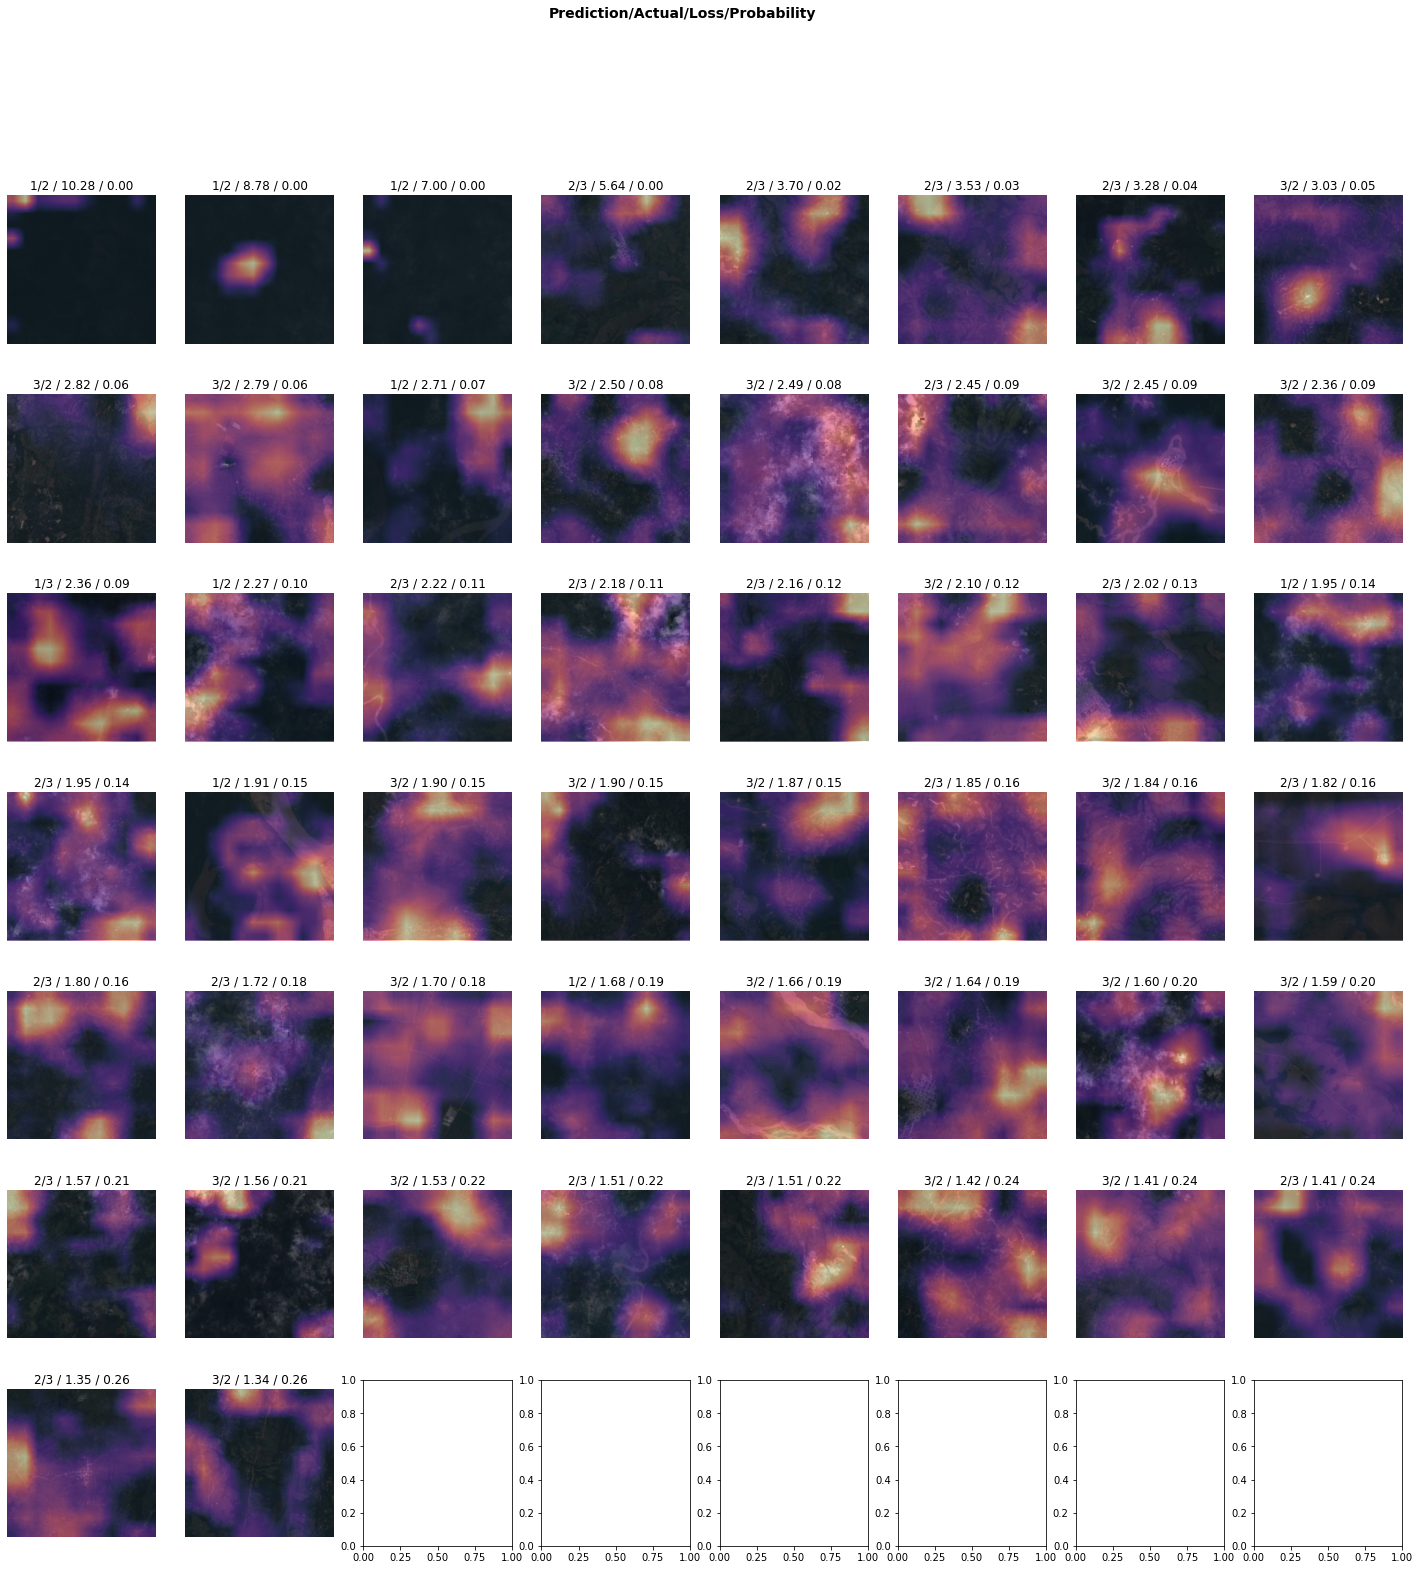

In [ ]:
interp.plot_top_losses(50, figsize=(25,25), heatmap=True)


In [ ]:
##to display filenames##
losses,idxs = interp.top_losses(50)
for p in data.valid_ds.x.items[idxs]:
    print(p)

/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_033316.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_002633.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_002986.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_029309.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_025375.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_051204.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_058994.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_032516.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_033419.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_033097.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_009877.tif
/root/.fastai/data/Imagery_06_12_2020/CNN_DIMG_COL_2018_ST_384_3840_13_037451.tif
/root/.fastai/da

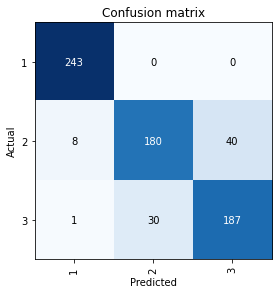

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.save('Ex1_COL_2018_ST_VI_384_3840_13_ALL_trn90_final')
!cp /root/.fastai/models/Ex1_COL_2018_ST_VI_384_3840_13_ALL_trn90_final.pth  /content/gdrive/"My Drive"/POBREZA/models/
learn.export(file='Ex1_lrn_COL_2018_ST_VI_384_3840_13_ALL_trn90_final.pkl') #train and export learner
!cp /root/.fastai/Ex1_lrn_COL_2018_ST_VI_384_3840_13_ALL_trn90_final.pkl  /content/gdrive/"My Drive"/POBREZA/models


#!cp /content/gdrive/"My Drive"/POBREZA/Imagery_06_12_2020.zip /root/.fastai/data/

In [ ]:
!ls /root/.fastai/data

cnn_ceni_col_2018_test10_dane350.csv  Imagery_06_12_2020      __MACOSX
cnn_ceni_col_2018_trn90_dane350.csv   Imagery_06_12_2020.zip


Inference

In [ ]:
#memory garbage collection: take object that stores a lot of mem -> avoid restarting notebook:
learn=None
gc.collect()

105825

cnn_ceni_col_2018_test10_dane350.csv  Imagery_06_12_2020      __MACOSX
cnn_ceni_col_2018_trn90_dane350.csv   Imagery_06_12_2020.zip
LabelLists;

Train: LabelList (3447 items)
x: ImageList
Image (3, 386, 384),Image (3, 386, 384),Image (3, 386, 384),Image (3, 386, 384),Image (3, 386, 384)
y: CategoryList
1,1,3,1,1
Path: /root/.fastai/data;

Valid: LabelList (3447 items)
x: ImageList
Image (3, 386, 384),Image (3, 386, 384),Image (3, 386, 384),Image (3, 386, 384),Image (3, 386, 384)
y: CategoryList
1,1,3,1,1
Path: /root/.fastai/data;

Test: None


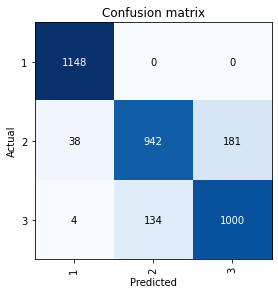

In [ ]:
#may require to free up space on GPU before running below

!ls /root/.fastai/data/
import pandas as pd
  # Create Databunch
df = pd.read_csv("/root/.fastai/data/cnn_ceni_col_2018_test10_dane350.csv")
df_val = df[['bin_GMM','name']]


il = ImageList.from_df(df=df_val,path='/root/.fastai/data/',cols='name',folder='Imagery_06_12_2020',suffix='')
ils = il.split_none() #All data on Train Set
ll = ils.label_from_df(0) 
ll.valid = ll.train # Trick!
print(ll)

ll.transform(tfms=None,size=384) # Optional Transforms 
data = ll.databunch(bs=64);
data.normalize(imagenet_stats) 

learn = cnn_learner(data, models.resnet34, metrics = error_rate)
learn = load_learner('/root/.fastai/', file='Ex1_lrn_COL_2018_ST_VI_384_3840_13_ALL_trn90_final.pkl')
learn.load('Ex1_COL_2018_ST_VI_384_3840_13_ALL_trn90_final')
learn.data.valid_dl = data.valid_dl #override with inference data with transfroms and other..
learn.loss_func = torch.nn.CrossEntropyLoss()
learn.metrics
 
interp = ClassificationInterpretation.from_learner(learn,ds_type=DatasetType.Valid)
interp.plot_confusion_matrix()


In [ ]:
tfms = None
data_test = data
# This is the function definition:

def evaluate_model_from_interp(interp, data):
    # perform a "manual" evaluation of the model to take a look at predictions vs. labels and to
    # re-compute accuracy from scratch (to double check and also because I didn't find a quick way
    # to extract accuracy inside the guts of Fast.ai after a call to validate() on the test set...)
    print(f'Interp has {len(interp.y_true)} ground truth labels: {interp.y_true}')
    print(f'Interp yielded {len(interp.preds)} raw predictions. First two raw predictions are: {interp.preds[:2]}')
    print(f'The problem had {len(data.classes)} classes: {data.classes}') # data.c is just len(data.classes)
    print('')
    print(f'Pred -> GroundTruth = PredLabel -> GroundTruthLabel')

    ok_pred = 0

    for idx, raw_p in enumerate(interp.preds):
        pred = np.argmax(raw_p)
        if idx < 10:
            print(f'{pred} -> {interp.y_true[idx]} = {data.classes[pred]} -> {data.valid_ds.y[idx]}')
        if pred == interp.y_true[idx]:
            ok_pred += 1

    acc = ok_pred / len(interp.y_true)
    print(f'Overall accuracy of the model: {acc:0.5f}')
#And then it can be called simply with:

evaluate_model_from_interp(interp, data_test)

Interp has 3447 ground truth labels: tensor([0, 0, 2,  ..., 2, 2, 2])
Interp yielded 3447 raw predictions. First two raw predictions are: tensor([[0.9324, 0.0215, 0.0461],
        [0.8890, 0.0217, 0.0893]])
The problem had 3 classes: [1, 2, 3]

Pred -> GroundTruth = PredLabel -> GroundTruthLabel
0 -> 0 = 1 -> 1
0 -> 0 = 1 -> 1
2 -> 2 = 3 -> 3
0 -> 0 = 1 -> 1
0 -> 0 = 1 -> 1
2 -> 1 = 3 -> 2
0 -> 0 = 1 -> 1
0 -> 0 = 1 -> 1
0 -> 0 = 1 -> 1
0 -> 0 = 1 -> 1
Overall accuracy of the model: 0.89643
